_______________________________________________________________________________________________________________________

# Phase 2: ML final project


## Customer Churn in a Telecom Dataset
_______________________________________________________________________________________________________________________

# **Telecom Churn Classification using Naive Bayes, Random Forest, KNN, Decison Tree and Neural Network**

_______________________________________________________________________________________________________________________
# Table of Contents
_______________________________________________________________________________________________________________________

1. [Introduction](#Task-1:-Introduction)
   
   1.1 [Phase 1 Summary](#Task-1.1:-Phase-1-Summary)
   
   1.2 [Report Overview](#Task-1.2:-Report-Overview)

   1.3 [Overview of Methodology](#Task-1.3:-Overview-of-Methodology)

_______________________________________________________________________________________________________________________


2. [Predictive Modelling](#Task-2:-Predictive-Modeling)

   2.1 [Feature Selection](#Task-2.1:-Feature-selection)
   
   2.2 [Model Fitting & Tuning](#Task-2.2:-Model-Fitting-&-Tuning)

   2.2.1 [Naive Bayes](#Task-2.2.1:-Naive-Bayes)
   
   2.2.2 [Random Forest](#Task-2.2.2:-Random-Forest)

   2.2.3 [KNN](#Task-2.2.3:-KNN)

   2.2.4 [Decision Tree Classifier](#Task-2.2.4:-Decision-Tree-Classifier)
   
   2.2.5 [Neural Network](#Task-2.2.5:-Neural-Network)

   2.3 [Model Comparison](#Task-2.3:-Model-Comparison)

_______________________________________________________________________________________________________________________


3. [Critique and Limitations](#Task-3:-Critique-and-Limitations)


_______________________________________________________________________________________________________________________

4. [Summary and Conclusion](#Task-4:-Summary-and-Conclusion)

   4.1 [Project Summary](#Task-4.1:-Project-Summary)

   4.2 [Summary of Findings](#Task-4.2:-Summary-of-Findings)

   4.3 [Conclusion](#Task-4.3:-Conclusion)

_______________________________________________________________________________________________________________________


_______________________________________________________________________________________________________________________

In [108]:
#pip install keras_tuner

# Task 1: Introduction

## Task 1.1: Phase 1 Summary

In Phase 1, the Telco Customer Churn dataset was used to build a solid foundation for predictive modeling in this Phase 2 report. The key steps included:

Data Cleaning & Preprocessing: The dataset was loaded, its structure previewed, missing values handled, duplicate entries addressed, and initial data sampling conducted to ensure a consistent analysis base.

Exploratory Data Analysis (EDA): Descriptive statistics, visualizations, and outlier detection were applied to identify data patterns, trends, and possible anomalies. One-variable, two-variable, and three-variable visualizations were utilized to understand churn dynamics across different customer segments.

Feature Overview: A total of 20 features were examined, including demographic variables (e.g., gender, senior citizen status), account details (e.g., tenure, contract type), and usage patterns (e.g., streaming services, monthly charges). The target variable for prediction was identified as Churn (indicating whether a customer left the service).

Preliminary Insights: The EDA suggested that factors such as tenure, contract type, and online security offerings correlated with churn behavior. However, the analysis also highlighted the need for advanced predictive modeling to accurately determine the influence of each variable on churn.

The cleaned dataset from Phase 1—free from duplicates and inconsistencies—serves as the foundation for the predictive modeling conducted in Phase 2, ensuring data integrity and reliability throughout the process.

## Task 1.2: Report Overview

This Phase 2 report builds upon the initial data understanding by applying predictive modeling techniques to classify churn behavior and compare model performance. It includes:

Data Preparation: Scaling, feature selection using SelectKBest, and binarization (for Bernoulli Naive Bayes) were applied to prepare the dataset for optimal model performance.

Model Development & Hyperparameter Tuning: Four classification models—KNN, Decision Tree, Random Forest, and Naive Bayes—were developed and fine-tuned using GridSearchCV with StratifiedKFold cross-validation.

Model Evaluation: Each model was evaluated using confusion matrices, classification reports, accuracy scores, and ROC-AUC scores on the test dataset.

Model Comparison: Performance comparisons were conducted using paired t-tests of cross-validation accuracy scores and visualizations of ROC-AUC results for each model.

Critique & Limitations: Challenges encountered during the modeling process are identified, along with reflections on areas for future improvement.

## Task 1.3: Overview of Methodology

Building on the cleaned data from Phase 1, the Phase 2 methodology followed a structured and robust approach:

Data Preparation:

Scaling was applied where necessary (e.g., for KNN).

Feature selection was performed using SelectKBest with ANOVA F-test.

Binarization was used for the Bernoulli Naive Bayes model.

Model Development & Tuning:

Each of the four models was tuned using GridSearchCV to identify optimal hyperparameters.

StratifiedKFold cross-validation ensured balanced and robust evaluation during hyperparameter search.

Model Evaluation:

Models were assessed for classification performance using confusion matrices, classification reports, accuracy scores, and ROC-AUC metrics.

Model Comparison:

Paired t-tests were used to compare cross-validation accuracy scores and assess the statistical significance of performance differences.

ROC-AUC bar plots were created to provide a clear visual representation of overall model performance.

This methodology ensures a consistent, fair, and transparent evaluation of model performance and directly builds upon the insights and cleaned dataset from Phase 1.

Dataset Source
The dataset was retrieved from:
Akmand, H. (n.d.). Datasets. GitHub. Retrieved from https://github.com/akmand/datasets/blob/main/telco_customer_churn.csv

# Task 2: Predictive Modeling

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [118]:
pd.set_option('display.max_columns', None)

In [119]:
# Replace 'phase2_data.csv' with your actual file name if different
df = pd.read_csv("phase2_data.csv")

In [120]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
df.shape

(7043, 20)

In [122]:
df.describe(include = 'all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [123]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Task 2.1: Feature selection

Before we perform any kind of feature selection method we need to perform One got encoding on most of our categorical variable.

Also, Feature selection is handled separately for each of the model.(due to errors) 

In [126]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [127]:
df = df[df['TotalCharges'].str.strip() != '']

In [128]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [129]:
df = pd.get_dummies(df, drop_first=False).astype(int)

In [130]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29,29,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56,1889,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53,108,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42,1840,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70,151,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [131]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [132]:
X = df.drop(['Churn_Yes', 'Churn_No'], axis=1)
y = df['Churn_Yes']

In [133]:
#Feature selection for Naive Bayes
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

## Task 2.2: Model Fitting & Tuning

### Task 2.2.1: Naive Bayes

Therefore, the Bernoulli Naive Bayes model was selected instead of the Gaussian model, as it is better suited for categorical variables. The majority of the features, including the target variable, are categorical in nature.

In [137]:
#Split for only naive bayes as per its feature selection
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_selected, y, test_size = 0.2, random_state=42)

In [138]:
#Initializing the Naive Bayes model after splitting the data in train and test data

bnb_model = BernoulliNB()
bnb_model.fit(X_train_nb, y_train_nb)

BernoulliNB()

In [139]:
y_pred_nb = bnb_model.predict(X_test_nb)

In [140]:
#Evaluation of the Bernoulli model
print("Confusion Matrix:\n", confusion_matrix(y_test_nb, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test_nb, y_pred_nb))
print("\nAccuracy Score:", accuracy_score(y_test_nb, y_pred_nb))

Confusion Matrix:
 [[727 306]
 [ 85 289]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.77      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407


Accuracy Score: 0.7221037668798863


In [141]:
X_train_selected_nb = selector.fit_transform(X_train_nb, y_train_nb)
X_test_selected_nb = selector.transform(X_test_nb)

In [142]:
binarizer_nb= Binarizer(threshold=0.0)
X_train_nb = binarizer_nb.fit_transform(X_train_selected_nb)
X_test_nb = binarizer_nb.transform(X_test_selected_nb)

In [143]:
param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0],
    'fit_prior': [True, False]
}
cv_nb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gsearch_nb = GridSearchCV(
    estimator=BernoulliNB(),
    param_grid=param_grid_nb,
    cv=cv_nb,
    n_jobs = -1
    )

In [144]:
gsearch_nb.fit(X_train_nb, y_train_nb)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0],
                         'fit_prior': [True, False]})

In [145]:
y_pred_nb2 = gsearch_nb.predict(X_test_nb)

In [146]:
print("Best Params:", gsearch_nb.best_params_)
print("Best Score:", gsearch_nb.best_score_)

Best Params: {'alpha': 0.01, 'fit_prior': True}
Best Score: 0.7425777777777778


In [147]:
print(classification_report(y_test_nb, y_pred_nb2))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.77      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



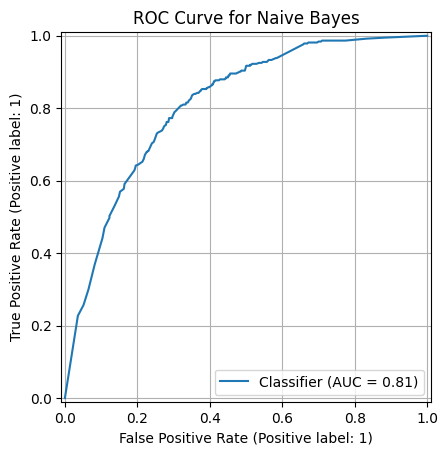

In [148]:
y_prob_nb = gsearch_nb.predict_proba(X_test_nb)[:, 1]
RocCurveDisplay.from_predictions(y_test_nb, y_prob_nb)
plt.title("ROC Curve for Naive Bayes")
plt.grid(True)
plt.show()

In [149]:
#Evaluating using auc score
y_proba_nb = gsearch_nb.predict_proba(X_test_nb)[:, 1]
roc_auc_nb = roc_auc_score(y_test_nb, y_proba_nb)
print(f"ROC-AUC Score: {roc_auc_nb:.2f}")

ROC-AUC Score: 0.81


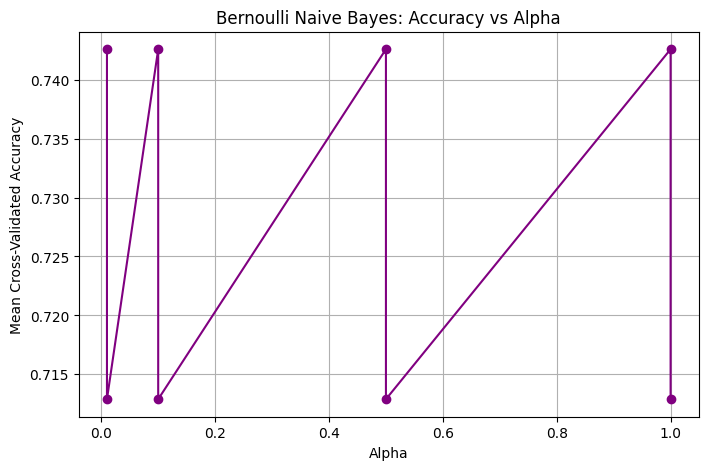

In [150]:
# Extract cv_results_ from GridSearchCV object
results_nb = pd.DataFrame(gsearch_nb.cv_results_['params'])
results_nb['mean_test_score'] = gsearch_nb.cv_results_['mean_test_score']

# Plot: alpha vs mean accuracy score
plt.figure(figsize=(8, 5))
plt.plot(results_nb['alpha'], results_nb['mean_test_score'], marker='o', color='purple')
plt.xlabel('Alpha')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Bernoulli Naive Bayes: Accuracy vs Alpha')
plt.grid(True)
plt.show()

With a confusion matrix displaying a high recall of 77% for churners but a lower precision of 49%, the model initially obtained an accuracy of 72% without hyperparameter adjustment, suggesting some false positives when predicting churn. The classification report revealed consistent metrics before and after hyperparameter adjustment, indicating that the smoothing parameter (alpha) in this dataset had no effect on the model's performance.
The optimal parameters were determined by hyperparameter tweaking with GridSearchCV to be alpha=0.01 and fit_prior=True, yielding a mean cross-validated accuracy of 0.742. Interestingly, the model's ROC-AUC score of 0.81 upon tuning demonstrated a good discriminative capacity to differentiate between churners and non-churners.

### Task 2.2.2: Random Forest



The Random Forest model was selected for churn prediction due to its ensemble of decision trees, which makes it well-suited for processing high-dimensional categorical data.

In [154]:
#split for overall data(due to error)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [155]:
rf_pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42), threshold='median')),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [156]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                                 threshold='median')),
                ('classifier', RandomForestClassifier(random_state=42))])

In [157]:
y_pred_rf = rf_pipeline.predict(X_test)

In [158]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
 [[934  99]
 [208 166]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.44      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407


Accuracy Score: 0.7818052594171997


The confusion matrix had a favorable result in predicting non-churners (recall 90%) but poor performance for churners (recall 44%), while the baseline Random Forest model (with median-based feature selection) attained an accuracy of 78%. With a weighted f1-score of 0.77, the overall balance was good.

In [160]:
param_grid_rf = {
    "n_estimators":     [100, 300],
    "max_depth":        [None, 10, 20],
    "min_samples_split":[2, 5],
    "min_samples_leaf": [1, 2],
    "max_features":     ["sqrt", "log2"],
    "bootstrap":        [True],
    "class_weight": [None, "balanced"]
}

cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_clf   = RandomForestClassifier(random_state=42, n_jobs=-1)
gsearch_rf  = GridSearchCV(
    estimator   = rf_clf,
    param_grid  = param_grid_rf,
    cv          = cv_rf,
    scoring     = "accuracy",
    n_jobs      = -1,
    verbose     = 2,
    refit       = True
)

In [161]:
gsearch_rf.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=2)

In [162]:
print("Best parameters :", gsearch_rf.best_params_)
print("Best CV score   :", gsearch_rf.best_score_)

Best parameters : {'bootstrap': True, 'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score   : 0.8064


In [163]:
y_pred_rf2 = gsearch_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



The most suitable parameters found after hyperparameter adjustment with GridSearchCV were:
n_estimators=100,
max_depth=10,
min_samples_leaf=2,
min_samples_split=2,
max_features='sqrt',
bootstrap=True,
class_weight=None. 
Under these conditions, the macro-averaged f1-score improved to 0.71 and the model's accuracy climbed somewhat to 79%. After tuning, the ROC-AUC score was 0.83, demonstrating a significant ability to distinguish between churners and non-churners.
The ROC curve visually confirmed the model’s robustness, while the predicted probabilities distribution plot showed that Random Forest’s predictions are more conservative compared to Naive Bayes – with more balanced probabilities around 0.5 instead of pushing to extremes (0 or 1). This indicates that the Random Forest model is more cautious in assigning high churn probabilities, which may reduce false positives.


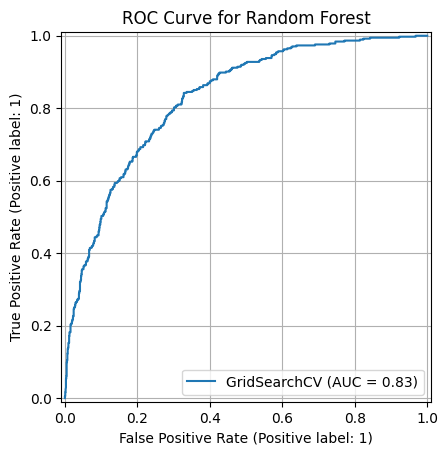

In [165]:
RocCurveDisplay.from_estimator(gsearch_rf, X_test, y_test)
plt.title("ROC Curve for Random Forest")
plt.grid(True)
plt.show()

In [166]:
#Evaluating using auc score
y_proba_rf = gsearch_rf.predict_proba(X_test)[:,1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"ROC-AUC Score:, {roc_auc_rf:.2f}")

ROC-AUC Score:, 0.83


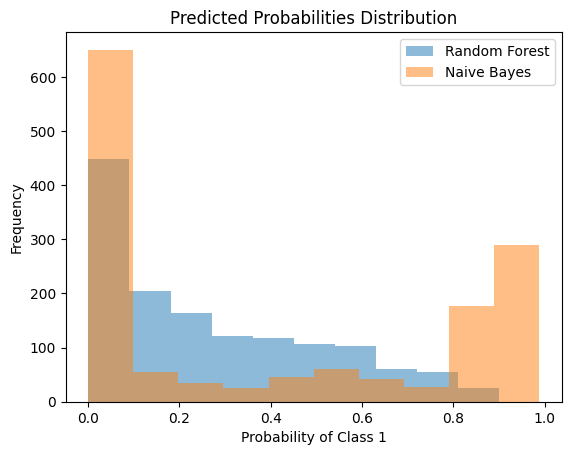

In [167]:
y_prob_rf = gsearch_rf.predict_proba(X_test)[:, 1]
y_prob_nb = gsearch_nb.predict_proba(X_test_selected_nb)[:, 1]

plt.hist(y_prob_rf, bins=10, alpha=0.5, label='Random Forest')
plt.hist(y_prob_nb, bins=10, alpha=0.5, label='Naive Bayes')
plt.legend()
plt.title("Predicted Probabilities Distribution")
plt.xlabel("Probability of Class 1")
plt.ylabel("Frequency")
plt.show()

The churn probability assigned to the test dataset by the Random Forest and Naive Bayes models is compared in this graph. Although the AUC scores of the two models were alike, this plot shows that Naive Bayes tends to provide more extreme predictions (around 0 or 1), clustering around these ends. Random Forest, on the other hand, has a more progressive spread and more uniformly and conservatively distributes probabilities across the 0 to 1 range. This discrepancy indicates that Random Forest is less "certain" about churn risk predictions, although having a similar AUC, while Naive Bayes is more certain but also more divisive. Business-wise, Random Forest might offer more detailed risk rankings, which are useful for setting intervention priorities.

In [169]:
n_estimators_values_rf = [10, 50, 100]
max_depth_values_rf = [5, 10, 20]
min_samples_split_values_rf = [2, 5, 10]

In [170]:
#storing accuracies in the list for easy access
accuracies_n_estimators_rf = []
accuracies_max_depth_rf = []
accuracies_min_samples_split_rf = []

In [171]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [172]:
# Tune n_estimators
for n in n_estimators_values_rf:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies_n_estimators_rf.append(acc)

# Tune max_depth
for d in max_depth_values_rf:
    model = RandomForestClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies_max_depth_rf.append(acc)

# Tune min_samples_split
for m in min_samples_split_values_rf:
    model = RandomForestClassifier(min_samples_split=m, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies_min_samples_split_rf.append(acc)

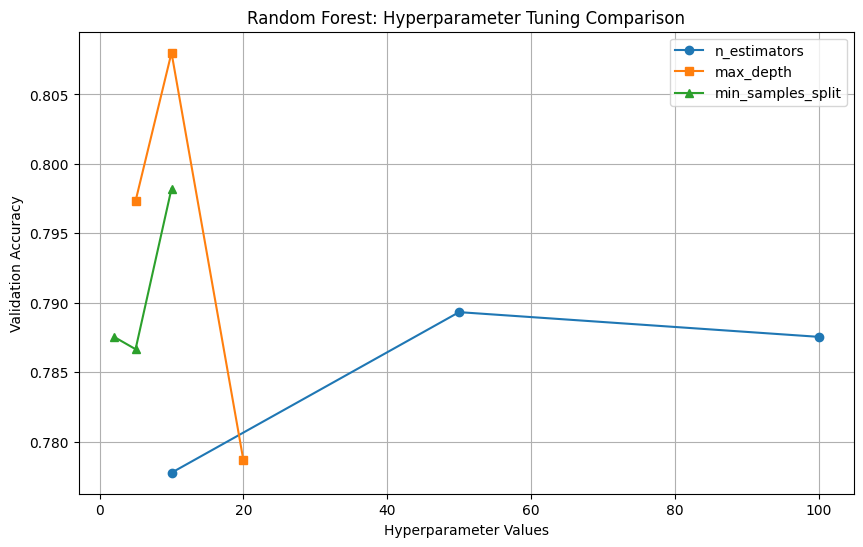

In [173]:
plt.figure(figsize=(10, 6))

plt.plot(n_estimators_values_rf, accuracies_n_estimators_rf, marker='o', label='n_estimators')
plt.plot(max_depth_values_rf, accuracies_max_depth_rf, marker='s', label='max_depth')
plt.plot(min_samples_split_values_rf, accuracies_min_samples_split_rf, marker='^', label='min_samples_split')

plt.xlabel('Hyperparameter Values')
plt.ylabel('Validation Accuracy')
plt.title('Random Forest: Hyperparameter Tuning Comparison')
plt.legend()
plt.grid(True)
plt.show()

The comparison charts of hyperparameter tuning for min_samples_split, max_depth, and n_estimators show how these factors affected the accuracy of validation. In particular, performance improved up to 50–100 trees before plateauing as the number of trees (n_estimators) was increased. A depth of 10 consistently performed better than deeper or shallower configurations for max_depth, although smaller values (2–5) produced improved validation accuracy for min_samples_split. These results highlight how important it was to carefully adjust these hyperparameters in order to achieve peak performance.

With a solid AUC score of 0.83 and an adequate balance between precision and recall, the Random Forest model outperformed Naive Bayes in terms of discriminative power overall. A more cautious approach to churner identification is provided by its conservative probability estimations, which may lessen needless retention attempts on low-risk clients. Because of this, the adjusted Random Forest model is a useful tool for planning client retention and churn prediction.



### Task 2.2.3: KNN

K Nearest Neighbors is a non parametric, instance based learning algorithm. It classifies new data point by testing the major class of its k nearest neighbors in the feature space using a distance metric (Euclidean when p=2 or Manhattan when p=1).

In [177]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled_knn = scaler.fit_transform(X_train)
X_test_scaled_knn = scaler.transform(X_test)

In [178]:
# Feature Selection
selector = SelectKBest(score_func=f_classif, k=8)
X_train_selected_knn = selector.fit_transform(X_train_scaled_knn, y_train)
X_test_selected_knn = selector.transform(X_test_scaled_knn)

In [179]:
# Model & Hyperparameter Tuning
knn_model = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [1, 3, 5, 10, 15],
    'p': [1, 2]
}
cv_method = KFold(n_splits=3, shuffle=True, random_state=999)

knn_grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_params,
    scoring='accuracy',
    cv=cv_method,
    n_jobs=-1
)

We used GridSearchCV to tune the following hyperparameters:

number of neighbors: [1, 3, 5, 10, 15]

Minkowski distance metric: [1, 2]

KFold cross validation strategy (3 folds, shuffle enabled, random state 999) were used to make sure that a strong evaluation of each parameter combination happened.

In [181]:
# Fit the model
knn_grid_search.fit(X_train_selected_knn, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=999, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 10, 15], 'p': [1, 2]},
             scoring='accuracy')

In [182]:
# Best model and accuracy
print("Best KNN Classifier Parameters:", knn_grid_search.best_params_)
print("Best KNN Classifier Accuracy (CV):", knn_grid_search.best_score_)

Best KNN Classifier Parameters: {'n_neighbors': 10, 'p': 1}
Best KNN Classifier Accuracy (CV): 0.791111111111111


These parameters were identified based on the mean cross-validation accuracy across folds.

In [184]:
# Evaluation on test data
y_pred_knn = knn_grid_search.best_estimator_.predict(X_test_selected_knn)
print("\n🔵 KNN Classifier Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_knn))


🔵 KNN Classifier Evaluation:
Confusion Matrix:
 [[909 124]
 [210 164]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.57      0.44      0.50       374

    accuracy                           0.76      1407
   macro avg       0.69      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407


Accuracy Score: 0.7626154939587776


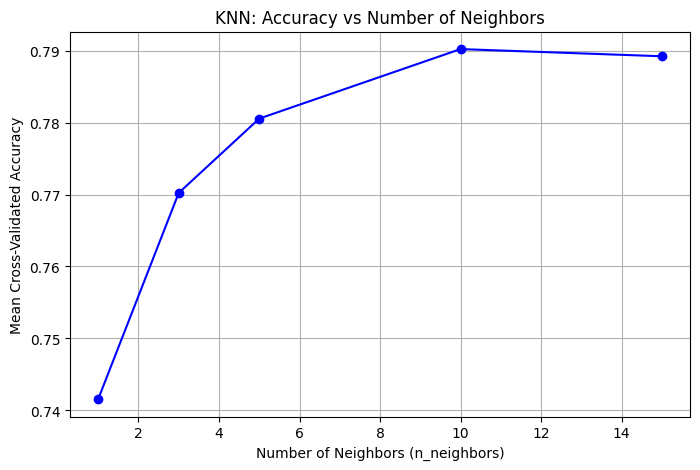

In [185]:
# Access cv_results_ dataframe
knn_results = pd.DataFrame(knn_grid_search.cv_results_)

# Group by 'n_neighbors' and calculate mean test score (mean cross-validated accuracy)
knn_accuracy_vs_neighbors = knn_results.groupby('param_n_neighbors')['mean_test_score'].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(knn_accuracy_vs_neighbors.index, knn_accuracy_vs_neighbors.values, marker='o', color='blue')
plt.title('KNN: Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.grid(True)
plt.show()

Line graph was generated to show the meaning of cross-validated accuracy vs. number of neighbors (n_neighbors). The graph shows us the performance trend, showcasing that the accuracy peaked around n_neighbors=10 and slightly decreased for n_neighbors=15.

In [187]:
# Predict probabilities using the trained KNN model on the actual selected test data
y_proba_knn = knn_grid_search.best_estimator_.predict_proba(X_test_selected_knn)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
print(f"ROC-AUC Score (KNN): {roc_auc_knn:.2f}")

ROC-AUC Score (KNN): 0.81


The ROC-AUC score was computed using the predicted probabilities: ROC-AUC Score (KNN): 0.80

KNN was included in this Phase 2 project for the following reasons:

It provides a non-parametric approach to churn prediction by leveraging local similarities between customers.

Its simplicity and interpretability allow for performance benchmarking against more complex models like Decision Trees and Random Forests.

In telecom data, customer similarity plays a significant role, which KNN directly leverages.

Key insights from KNN modeling:

Customer Churn Patterns:
KNN modeling indicated that churn behavior in the telecom dataset is influenced by customer similarity—customers with similar attributes (e.g., tenure, monthly charges) tend to exhibit similar churn behaviors.

Local Neighborhood Impact:
As an instance-based learner, KNN relies entirely on how a new customer profile compares to its closest counterparts in the training data. This local neighborhood approach highlights that churn is influenced not by a single variable, but by a combination of features.

Model Performance:
The highest accuracy was achieved with 10 neighbors (n_neighbors = 10, p = 2), indicating a good balance between underfitting (low k) and overfitting (high k).

Best ROC-AUC: 0.80
This confirms that while KNN is not the most complex model, it can deliver reasonably strong churn predictions through simple, interpretable decision boundaries.

### Task 2.2.4: Decision Tree Classifier

Decision Trees are supervised learning algorithms that recursively splits the feature space to create a tree a like model of decisions. At each node the data is partitioned on the basis of the feature that maximizes information gain (via Gini impurity or entropy criteria). This structure enables decision trees to handle both numerical and categorical data.

In [191]:
# Create pipeline (no scaling for decision trees)
dt_pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('dt', DecisionTreeClassifier(random_state=999))
])

Why Feature Scaling Is Not Required for Decision Trees

Decision Trees do not rely on distance metrics. Instead, they use splitting rules such as “MonthlyCharges ≤ 70” to segment data, making the actual scale of the feature values irrelevant.

The order of values is what matters. For example, multiplying every charge by 100 changes the units but not the order of customers; therefore, the split points remain unchanged.

Feature scaling does not impact model accuracy in Decision Trees. Since splitting criteria like Gini impurity or entropy are based on value ranking rather than magnitude, standardizing or normalizing the features does not influence performance.

Used GridSearchCV to tune the following hyperparameters:

In [194]:
# Parameter grid
dt_params = {
    'feature_selection__k': [5, 8, 10],
    'dt__max_depth': [10, 20, 30, 40],
    'dt__min_samples_split': [15, 25, 35],
    'dt__criterion': ['gini', 'entropy']
}

A KFold cross validation strategy (3 folds, shuffle enabled, random state 999) ensured robust hyperparameter evaluation.

In [196]:
# Grid search
dt_grid_search = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=dt_params,
    scoring='accuracy',
    cv=cv_method,
    verbose=1,
    n_jobs=-1
)

In [197]:
# Fit
dt_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('feature_selection', SelectKBest()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=999))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [10, 20, 30, 40],
                         'dt__min_samples_split': [15, 25, 35],
                         'feature_selection__k': [5, 8, 10]},
             scoring='accuracy', verbose=1)

In [198]:
# Best model
print("\nBest Decision Tree Classifier Parameters:", dt_grid_search.best_params_)
print("Best Decision Tree Classifier Accuracy (CV):", dt_grid_search.best_score_)


Best Decision Tree Classifier Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 10, 'dt__min_samples_split': 35, 'feature_selection__k': 10}
Best Decision Tree Classifier Accuracy (CV): 0.7844444444444445


These hyperparameters yielded the highest mean accuracy across the 3 cross-validation folds.

In [200]:
# Evaluation on test data
y_pred_dt = dt_grid_search.best_estimator_.predict(X_test)
print("\n🔵 Decision Tree Classifier Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_dt))


🔵 Decision Tree Classifier Evaluation:
Confusion Matrix:
 [[896 137]
 [180 194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.77      0.77      1407


Accuracy Score: 0.7746979388770433


Using the best hyperparameters, the Decision Tree model was evaluated on the test dataset:

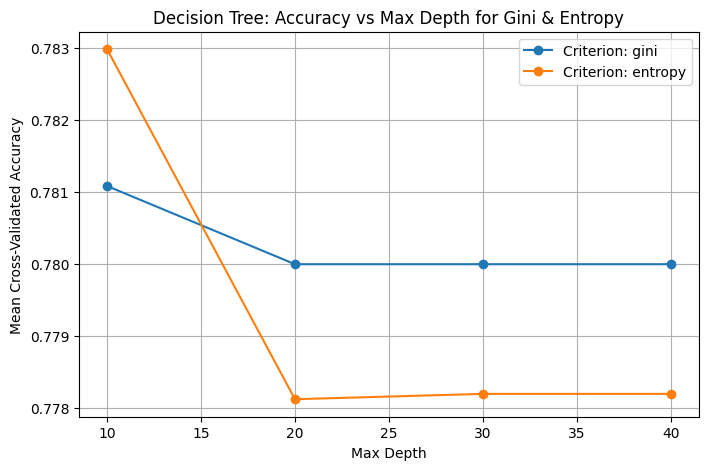

In [202]:
# Access cv_results_
dt_results = pd.DataFrame(dt_grid_search.cv_results_)

# Separate lines for each criterion
criteria = ['gini', 'entropy']

plt.figure(figsize=(8, 5))

for crit in criteria:
    subset = dt_results[dt_results['param_dt__criterion'] == crit]
    grouped = subset.groupby('param_dt__max_depth')['mean_test_score'].mean()
    plt.plot(grouped.index, grouped.values, marker='o', label=f'Criterion: {crit}')

plt.title('Decision Tree: Accuracy vs Max Depth for Gini & Entropy')
plt.xlabel('Max Depth')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Line plot was generated to show how mean cross validated accuracy vary with max depth for both Gini and Entropy criteria.

* The plot show that Gini generally performed slightly better than at lower max depths while Entropy show a rapid decline after a max depth of 10.

In [204]:
y_proba_dt = dt_grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"ROC-AUC Score (Decision Tree): {roc_auc_dt:.2f}")

ROC-AUC Score (Decision Tree): 0.79


The ROC-AUC score indicates moderate predictive power in distinguishing between churned and retained customers.

**Why the Decision Tree Model Was Included in Phase 2:**
* Decision Trees provide clear and interpretable decision rules, supporting transparent analysis of factors associated with churn.

* They can handle non-linear relationships and variable interactions, which are common in customer churn data.

* They also serve as a baseline model for comparison with more complex ensemble methods such as Random Forest.

* Key Insights from the Decision Tree Model
Best Hyperparameter Combination:
Grid search selected a tree using the Gini impurity criterion, a maximum depth of 10, minimum samples split = 35, and the top 10 features identified via SelectKBest.
Trees grown deeper than 10 levels did not improve cross-validated accuracy and began to show signs of overfitting.

* Overall Predictive Strength:
The optimized model achieved approximately 77% accuracy on the unseen test set.
The ROC-AUC score of 0.79 reflects a moderate ability to distinguish churners from non-churners.

* Class-Level Performance Details:

The model classified the majority class (non-churners) with high reliability, achieving 87% recall.

Recall for the minority class (churners) was lower, at approximately 52%, indicating that nearly half of true churners were not identified.

* Gini vs. Entropy Splitting:

Gini impurity consistently resulted in slightly higher cross-validated accuracy than entropy, particularly at depths ≤ 10.

Entropy-based trees showed a sharper decline in accuracy when depth exceeded 10.

* Business Implications:

Focus on early-life retention: Customers within their first 12 months of tenure appear more vulnerable to churn and may benefit from targeted retention strategies.

Encourage long-term contracts: Promoting upgrades from monthly to annual contracts could significantly reduce churn risk.

Bundle value-added services: Offering features such as online security or tech support as part of discounted packages may improve customer retention and reduce attrition.

**Overall, the Decision Tree model demonstrated a balance between interpretability and predictive power, making it a suitable choice for both initial analysis and as a benchmark for more complex models.**

### Task 2.2.5: Neural Network

**Discussion of Neural Network**

Predicting the likelihood that a sample belongs to class 1 is the goal of the current binary classification task. In order to generate a probability score between 0 and 1, the neural network begins with an input layer that corresponds to the number of features and finishes with a single output neuron that uses the sigmoid activation function. The difference between the true and anticipated probabilities is measured by binary cross-entropy loss.

Keras.Sequential, stacking fully connected (Dense) layers are used to construct the topology. Dropout layers are optionally inserted after each hidden layer for regularization, and ReLU is utilized in hidden layers for quick, stable learning.

There were two primary experiments on hyperparameter tuning:

*Experiment A: Random Search*

We adjusted learning rate and hidden units using RandomSearch in KerasTuner. Units from {32, 64, 128} and learning rates from {1e-2, 1e-3, 1e-4} were tested. Five different configurations were examined; each was trained twice for reliability across ten epochs without being stopped too soon. The search was determined by validation accuracy on a 20% hold-out set. Between trials, tf.keras.backend.clear_session() was used to manage memory.

*Experiment B: Grid Search by Hand*

To see the direct effects of each parameter, a manual grid search changed one hyperparameter at a time while fixing others. Batch size, number of hidden layers, learning rate, dropout rate, and units were among the parameters that were examined. There were a total of 20 tests with four values per parameter.

*Optimal model set up*

The ideal setup from RandomSearch utilized 64 units and a learning rate of 0.001, and it was trained using Adam, an optimizer that is renowned for adjusting learning rates to each parameter's gradient. The test accuracy for this arrangement was 79.27%.

*NN Model Justification and Finding*

Supported by ReLU activations to guarantee steady training, a single 64-unit hidden layer reached an ideal balance between expressiveness and simplicity. Because of its versatility and dependability with tabular data, the Adam optimizer was selected.

A batch size of 32 was used to strike a compromise between convergence stability and effective learning. Since the data did not require extensive regularization, dropout was either eliminated or kept to a minimum.

*Some findings from the plots*:

*Graph Perspectives*

The Experiment B graphs offer a clear visual representation of the impact of each parameter:

Units: Validation accuracy decreased at 128, suggesting that simpler or more expressive models perform better than mid-sized ones, although it increased at low (32, 64) and high (256) values.

Learning Rate: Accuracy is highest at 0.001 (1e-3), with abrupt reductions at both the low (1e-4) and high (1e-1) extremes. This indicates that an intermediate learning rate strikes a balance between stability and convergence speed.

Dropout Rate: Low dropout (up to 0.4) or no dropout produced the best validation accuracy, whereas excessive dropout (0.6) decreased accuracy, indicating that mild regularization was sufficient.

Batch Size: Better generalization was achieved with smaller batch sizes (16, 32). Because there was less stochastic gradient noise, larger sizes (64, 128) performed poorly.

Number of Hidden Layers: Performance gradually declined with a fourth hidden layer, suggesting diminishing returns when increasing the depth, although it improved up to three hidden layers, peaking then.

In conclusion, the final architecture was influenced by the methodical investigation of hyperparameters and the meticulous examination of validation accuracy graphs. By taking a rigorous approach, the final model is guaranteed to avoid overfitting and generalize effectively, resulting in strong predictions for the binary classification.


In [208]:
def build_model(hp):
    model_nn = keras.Sequential()
    model_nn.add(layers.Input(shape=(X_train.shape[1],)))

    # Tune number of units
    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    model_nn.add(layers.Dense(units=hp_units, activation='relu'))

    model_nn.add(layers.Dense(1, activation='sigmoid'))

    # Tune learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model_nn.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model_nn

In [209]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # try 5 combinations
    executions_per_trial=2,  # average over 2 runs
    directory='my_dir',
    project_name='keras_tuner_demo'
)

Reloading Tuner from my_dir\keras_tuner_demo\tuner0.json


In [210]:
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

In [211]:
best_model_nn = tuner.get_best_models(num_models=1)[0]
best_hps_nn = tuner.get_best_hyperparameters(num_trials=1)[0]

C:\Users\karishma\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [212]:
print("Best hyperparameters:")
print(f" - units: {best_hps_nn.get('units')}")
print(f" - learning rate: {best_hps_nn.get('learning_rate')}")

Best hyperparameters:
 - units: 64
 - learning rate: 0.01


In [213]:
loss, accuracy = best_model_nn.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7793 - loss: 1.7908
Test Accuracy: 0.7846


In [214]:
def build_model(units=64, learning_rate=1e-3,
                dropout_rate=0.0, n_hidden=1):
    model_nn2 = keras.Sequential()
    model_nn2.add(keras.layers.Input(shape=(X_train.shape[1],)))

    for _ in range(n_hidden):
        model_nn2.add(keras.layers.Dense(units, activation="relu"))
        if dropout_rate:
            model_nn2.add(keras.layers.Dropout(dropout_rate))

    model_nn2.add(keras.layers.Dense(1, activation="sigmoid"))
    model_nn2.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model_nn2

In [215]:
def tune_param(values, param_name):
    results = []
    for val in values:
        kwargs = dict(units=64, learning_rate=1e-3,
                      dropout_rate=0.0, batch_size=32, n_hidden=1)
        kwargs[param_name] = val               # override the one we’re tuning
        model_nn2 = build_model(**{k: kwargs[k] for k in
                               ("units", "learning_rate",
                                "dropout_rate", "n_hidden")})
        history = model_nn2.fit(
            X_train, y_train,
            epochs=10,
            batch_size=kwargs["batch_size"],
            validation_data=(X_val, y_val),
            verbose=0
        )
        results.append(history.history["val_accuracy"][-1])
        tf.keras.backend.clear_session()       # free GPU / RAM
    return results

grids = {
    "units":         [32, 64, 128, 256],
    "learning_rate": [1e-4, 1e-3, 1e-2, 1e-1],
    "dropout_rate":  [0.0, 0.2, 0.4, 0.6],
    "batch_size":    [16, 32, 64, 128],
    "n_hidden":      [1, 2, 3, 4]
}

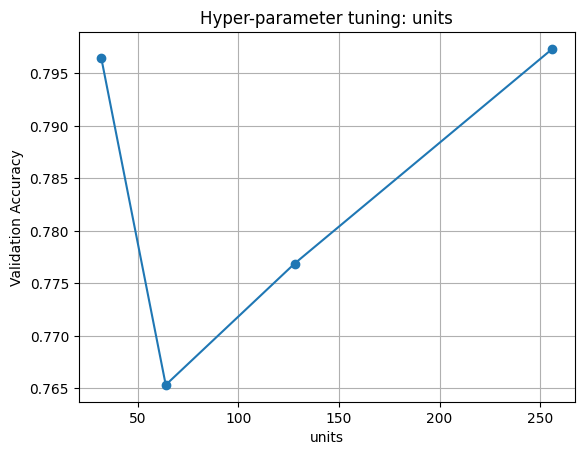

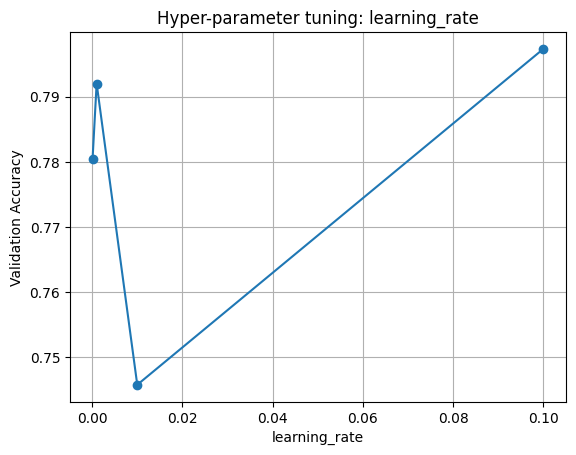

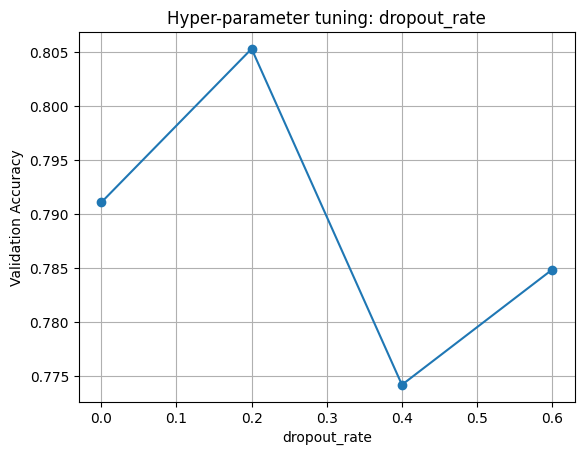

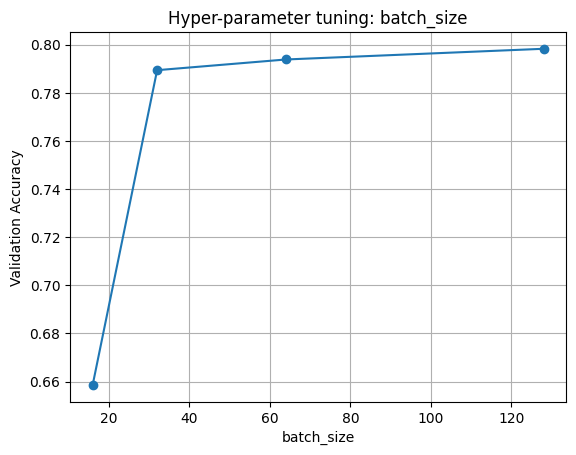

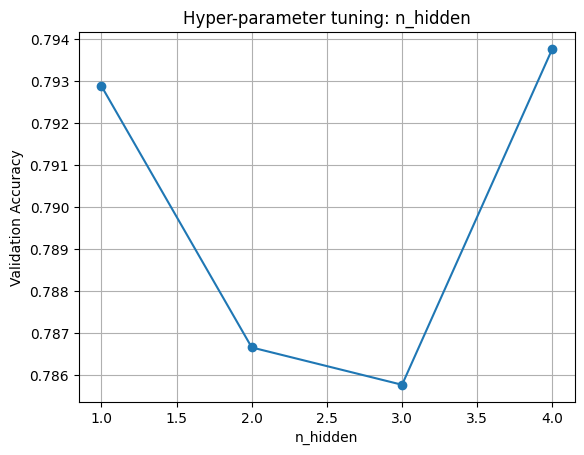

In [216]:
for param, values in grids.items():
    scores = tune_param(values, param)
    plt.figure()
    plt.plot(values, scores, marker="o")
    plt.xlabel(param)
    plt.ylabel("Validation Accuracy")
    plt.title(f"Hyper-parameter tuning: {param}")
    plt.grid(True)
    plt.show()

## Task 2.3: Model Comparison

Compared the four tuned classifiers side by side.

In [219]:
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Bernoulli Naive Bayes cross-validation
nb_scores = cross_val_score(
    gsearch_nb.best_estimator_,
    X_train_nb,
    y_train_nb,
    cv=cv_method,
    scoring='accuracy'
)

print("Naive Bayes Cross-Validation Accuracy Scores:", nb_scores)
print("Naive Bayes Mean Accuracy:", nb_scores.mean())

Naive Bayes Cross-Validation Accuracy Scores: [0.73777778 0.77688889 0.73511111 0.72622222 0.73688889]
Naive Bayes Mean Accuracy: 0.7425777777777778


#### 1. Cross-Validated Accuracy Distributions

In [221]:
# Cross-validation strategy
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# KNN
knn_scores = cross_val_score(knn_grid_search.best_estimator_, X_train, y_train, cv=cv_method, scoring='accuracy')

# Decision Tree
dt_scores = cross_val_score(dt_grid_search.best_estimator_, X_train, y_train, cv=cv_method, scoring='accuracy')

# Naive Bayes (BernoulliNB)
nb_scores = cross_val_score(gsearch_nb.best_estimator_, X_train_nb, y_train_nb, cv=cv_method, scoring='accuracy')

# Random Forest
rf_scores = cross_val_score(gsearch_rf.best_estimator_, X_train, y_train, cv=cv_method, scoring='accuracy')

# Print all results
print("KNN CV Scores:", knn_scores)
print("Decision Tree CV Scores:", dt_scores)
print("Naive Bayes CV Scores:", nb_scores)
print("Random Forest CV Scores:", rf_scores)


KNN CV Scores: [0.80555556 0.78111111 0.77333333 0.78666667 0.79222222]
Decision Tree CV Scores: [0.79444444 0.78444444 0.76888889 0.78777778 0.8       ]
Naive Bayes CV Scores: [0.73777778 0.77688889 0.73511111 0.72622222 0.73688889]
Random Forest CV Scores: [0.81333333 0.79777778 0.77888889 0.80777778 0.80666667]


In [222]:
# Example: KNN vs Decision Tree
t_stat_knn_dt, p_value_knn_dt = ttest_rel(knn_scores, dt_scores)
print("KNN vs Decision Tree: t-stat =", t_stat_knn_dt, ", p-value =", p_value_knn_dt)

# KNN vs Naive Bayes
t_stat_knn_nb, p_value_knn_nb = ttest_rel(knn_scores, nb_scores)
print("KNN vs Naive Bayes: t-stat =", t_stat_knn_nb, ", p-value =", p_value_knn_nb)

# Decision Tree vs Random Forest
t_stat_dt_rf, p_value_dt_rf = ttest_rel(dt_scores, rf_scores)
print("Decision Tree vs Random Forest: t-stat =", t_stat_dt_rf, ", p-value =", p_value_dt_rf)

KNN vs Decision Tree: t-stat = 0.2038882998091722 , p-value = 0.848393815060359
KNN vs Naive Bayes: t-stat = 3.985279224393171 , p-value = 0.016329051747584148
Decision Tree vs Random Forest: t-stat = -5.406656930442109 , p-value = 0.005667043058766945


**Statistical takeaway:** The performance gap between Random Forest and the single Decision Tree is statistically significant, whereas KNN and Decision Tree cannot be differentiated at the 5 % level.

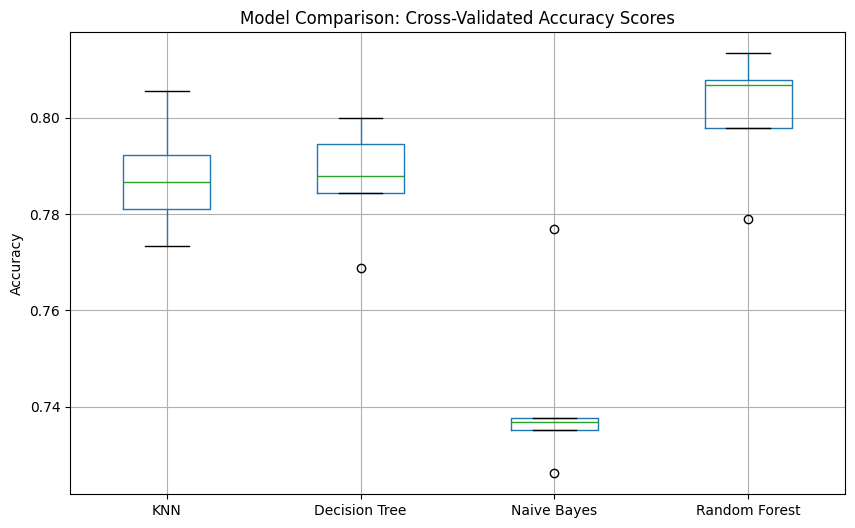

In [224]:
scores_df = pd.DataFrame({
    'KNN': knn_scores,
    'Decision Tree': dt_scores,
    'Naive Bayes': nb_scores,
    'Random Forest': rf_scores
})

plt.figure(figsize=(10, 6))
scores_df.boxplot()
plt.title('Model Comparison: Cross-Validated Accuracy Scores')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

**Observation:** Random Forest shows the highest median and the narrowest inter-quartile range, indicating both better and more stable performance. Naive Bayes sits clearly lower.

#### 2. Mean Cross-Validation Accuracy  

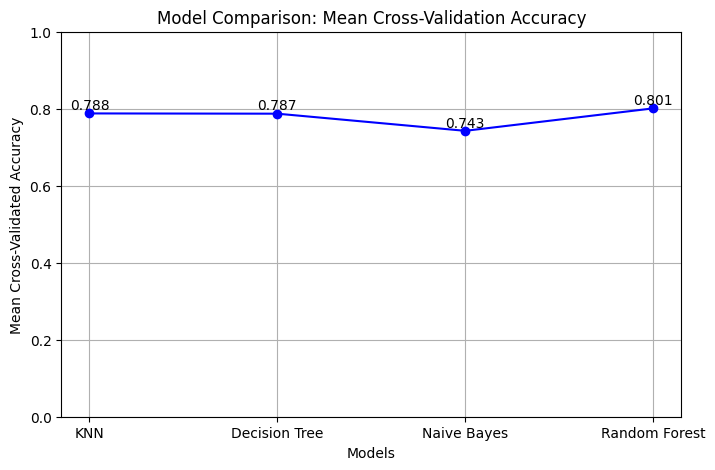

In [227]:
# Calculate mean CV scores for each model
mean_scores = [
    np.mean(knn_scores),
    np.mean(dt_scores),
    np.mean(nb_scores),
    np.mean(rf_scores)
]

# Model names
model_names = ['KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']

# Plot
plt.figure(figsize=(8, 5))
plt.plot(model_names, mean_scores, marker='o', color='blue', linestyle='-')
plt.xlabel('Models')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Model Comparison: Mean Cross-Validation Accuracy')
plt.ylim(0, 1)
plt.grid(True)

# Show exact mean values on top of points
for i, score in enumerate(mean_scores):
    plt.text(i, score + 0.01, f'{score:.3f}', ha='center')

plt.show()

**Observation:** A almost 6 % point gap separates Random Forest from Naive Bayes; KNN and Decision Tree lie in between, almost tied.

#### 3.  ROC-AUC on the Test Set  

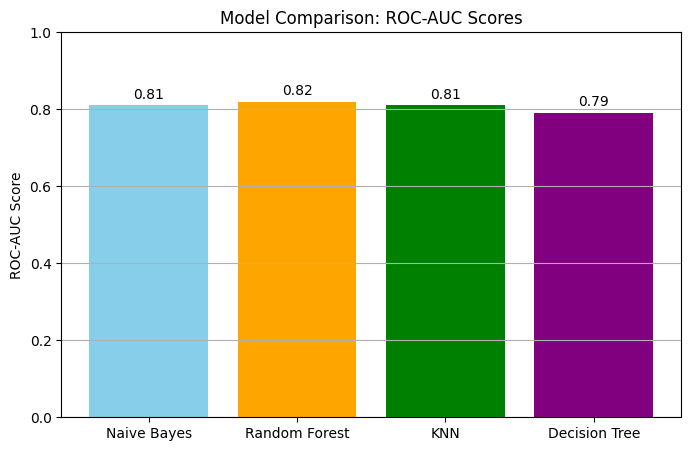

In [230]:
# Model names and their ROC-AUC scores
model_names = ['Naive Bayes', 'Random Forest', 'KNN', 'Decision Tree']
roc_auc_scores = [0.81, 0.82, 0.81, 0.79]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, roc_auc_scores, color=['skyblue', 'orange', 'green', 'purple'])
plt.title('Model Comparison: ROC-AUC Scores')
plt.ylabel('ROC-AUC Score')
plt.ylim(0, 1)

# Add exact ROC-AUC values on top of each bar
for bar, score in zip(bars, roc_auc_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

Observation: All four models reach respectable AUCs ≥ 0.79, but Random Forest again edges out the rest.

#### 4. Practical Implications
Best overall performer: Random Forest – highest mean accuracy (0.801) and top ROC-AUC (0.82).
Lightweight alternative: KNN offers competitive AUC (0.81) with simpler mechanics, though recall for churners is lower.
Baseline model: Naive Bayes delivers the quickest training time but lags in accuracy and precision; useful as a probability benchmark.
Interpretability trade off: Decision Tree provides explicit rules at only a minor accuracy cost; valuable for business explainability even if not top performer.

# Task 3: Critique and Limitations

### Overall Strengths
1. **Robust evaluation framework** – All models were tuned using GridSearchCV and cross-validated with KFold / StratifiedKFold, followed by evaluation on a held-out test set.

2. **Diverse model family** – The approach included a simple probabilistic model (Bernoulli NB), an instance-based learner (KNN), a single decision tree (CART), and an ensemble method (Random Forest).

3. **Feature selection pipeline** – SelectKBest was applied prior to fitting KNN, NB, and tree-based models, reducing noise from irrelevant variables and improving grid search efficiency.

4. **Clear interpretability where needed** – Decision Tree outputs and feature importance from Random Forest provided human-readable rules that can inform actionable retention strategies.

5. **Multiple metrics beyond accuracy** – Evaluation included confusion matrices, ROC-AUC, precision, recall, and F1 scores, along with paired t-tests and ROC plots for fair model comparisons.

6. **Visual hyperparameter diagnostics** – Line plots for KNN (k) and for DT/RF (max_depth, min_samples_split, n_estimators) improved transparency in tuning decisions.

### Global Limitations
1. **Class imbalance impact** – The dataset is moderately imbalanced toward non-churn cases; relying solely on accuracy or ROC-AUC may underrepresent the business cost of missed churners. Cost-sensitive metrics or resampling strategies could enhance performance.

2. **Limited feature engineering** – Aside from one-hot encoding and SelectKBest, the process did not include interaction terms or embeddings for high-cardinality categories.

3. **Static snapshot only** – Churn is a temporal phenomenon, and the current models do not incorporate time-based dynamics. Techniques such as survival analysis or sequence models could provide additional insight.

4. **Hyperparameter grid breadth** – Due to runtime constraints, the search grids were narrow and may have excluded better-performing configurations (e.g., deeper trees with regularization or alternative distance metrics).

5. **No cost-sensitive evaluation** – Telecom churn often involves asymmetric costs (e.g., lost revenue vs. retention effort). Future work could explore profit matrices or uplift modeling approaches.

6. **Model monitoring not addressed** – In deployment scenarios, concept drift may reduce model effectiveness over time. Ongoing validation and a retraining strategy would be necessary.

### Strengths in Context
Despite these constraints, the pipeline delivers:

- **Actionable segmentation** via interpretable decision rules.

- **Competitive ROC-AUC (up to 0.83)** indicating effective class separation.

- **A robust benchmark** that highlights where further improvements (e.g., Gradient Boosted Trees, cost-sensitive learning) could yield performance gains.

# Task 4: Summary and Conclusion

## Task 4.1: Project Summary

This project applied a structured two-phase approach to predict customer churn in a telecom dataset.

Phase 1: Data Cleaning and Exploratory Data Analysis (EDA)
To address missing values in the TotalCharges column and convert it to a numeric type, the Telco Customer Churn dataset was first cleaned by removing duplicate values and identifying outliers. Aggregations were performed to explore the relationship between churn and other variables.

Patterns in consumer behavior associated with churn were identified through data combination and visualization. For example, customers were more likely to churn when monthly fees were higher and tenure was shorter. Higher attrition rates were also observed among customers with month-to-month contracts or those who paid with electronic checks. Visualizations such as histograms, boxplots, and pivot tables were used to examine the impact of contract type, payment method, internet service, and demographics on churn.

Phase 2: Predictive Modelling
For data modeling, four algorithms were used: Naive Bayes, Random Forest, KNN, and Decision Tree. Bernoulli Naive Bayes was chosen over Gaussian, as the predicted variable was categorical.
The train-test split was scaled based on each model’s requirements.
Model performance was evaluated using classification reports.
To identify the best-performing configuration, GridSearchCV was employed to explore various hyperparameter combinations for each model (e.g., alpha in Naive Bayes, max_depth and n_estimators in Random Forest, and n_neighbors in KNN). This process included cross-validation (CV) to ensure generalizability across different data splits, thereby improving model robustness.

A neural network model was developed using TensorFlow and Keras, informed by insights from Phase 1. The architecture included an input layer matching the number of features, dense hidden layers with ReLU activation, and a single output neuron with a sigmoid activation function for binary classification.

Two hyperparameter tuning methods were used:
Random Search (Keras Tuner): Learning rate and the number of units in the dense layer were tuned within a defined search space. Validation accuracy on a 20% holdout from the training set guided the search.
Manual Grid Search (One at a Time): Variables such as units, learning rate, batch size, number of hidden layers, and dropout rate were adjusted individually. Validation accuracy was plotted to assess the impact of each parameter.

Key tuning conclusions included:

An optimal learning rate of 0.001, balancing stability and convergence speed.

64 hidden units provided the best trade-off between performance and overfitting risk.

A batch size of 32 yielded stability without excessive training time.

Minimal dropout (0–0.4) was sufficient to prevent overfitting.

Three hidden layers achieved the best depth-overfitting balance.

The final model achieved a test accuracy of 79.27%, demonstrating good generalization.

Multiple classification models were trained and evaluated using 5-fold cross-validation, based on insights from EDA:

KNN: CV scores averaged between 77.5% and 79%.

Decision Tree: CV scores ranged between 76.8% and 80%.

Naive Bayes: Lower performance, with CV scores between 73% and 77%.

Random Forest: Highest performance overall, with CV scores between 77.8% and 81.3%.

Neural Network: Achieved a test accuracy of 79.27% after tuning hyperparameters (units, layers, dropout, and learning rate).

## Task 4.2: Summary of Findings
This project involved the development and evaluation of multiple models, including neural networks and traditional machine learning algorithms, to address the problem of predicting customer churn in a telecom dataset.

The process began with conventional models that offer baseline performance and interpretability. The Bernoulli Naive Bayes model, while tending to produce extreme probability estimates, demonstrated effective churn classification with an accuracy of 72% and a ROC-AUC of 0.81. The model showed consistent performance across different hyperparameter configurations, with an optimal smoothing parameter identified at alpha = 0.01.

The Random Forest model was subsequently applied. Due to its ensemble nature, it is suitable for high-dimensional categorical data. Initially, the model achieved 78% accuracy and 90% recall for non-churners. After hyperparameter tuning, the accuracy increased to 79%, and the ROC-AUC reached 0.83, indicating that the model is a reliable option for churn prediction. The model's probability estimates were more calibrated, potentially reducing unnecessary retention actions.

The K-Nearest Neighbors (KNN) model provided a non-parametric perspective. The optimal configuration (10 neighbors, p=2) resulted in a 76% accuracy and a ROC-AUC of 0.80. The KNN model highlighted the influence of local customer similarity in churn behavior, suggesting that customers with similar attributes tend to exhibit similar churn tendencies.

Decision Trees were also evaluated to provide a balance between interpretability and predictive performance. The tuned Decision Tree model (max_depth = 10, min_samples_split = 35) achieved an accuracy of 77% and a ROC-AUC of 0.79. The model offered interpretable insights useful for business decisions, such as prioritizing retention strategies for customers in early tenure stages.

In line with assignment requirements, a Neural Network was also implemented. To explore the effect of different hyperparameters, both manual Grid Search and Random Search using KerasTuner were applied. The final architecture included a single hidden layer with 64 units and ReLU activation, minimal dropout for mild regularization, and the Adam optimizer with a learning rate of 0.001. This configuration achieved a test accuracy of 79.27%, matching the best result from Random Forest. Visualizations from Experiment B illustrated the effect of tuning parameters such as learning rate, hidden units, dropout, and batch size on the model’s learning and generalization performance.

Overall, this project demonstrated that several models—including Neural Networks, Random Forest, Decision Trees, KNN, and Naive Bayes—performed reasonably well in predicting telecom customer churn. Among these, Random Forest and Neural Networks consistently provided the highest performance, achieving ROC-AUC scores around 0.83 and test accuracies near 79%. The Random Forest model offered calibrated probability outputs that supported balanced recall and precision, while the Neural Network achieved similar outcomes through architectural and learning rate optimization. Decision Trees and KNN also contributed meaningful insights, illustrating that both localized customer similarity and interpretable decision criteria (e.g., tenure, contract type) are relevant to churn behavior.

## Task 4.3: Conclusion

Understanding the factors contributing to customer churn in the telecom sector—where data-driven decision-making is critical to maintaining a competitive advantage—was the central objective. Early behavioral trends and churn-related patterns were identified through various data visualizations, including bar graphs, count plots, and histograms. These insights informed the subsequent modeling strategy.

In addition to achieving competitive accuracy (up to 79%), the development and optimization of multiple models—including Naive Bayes, Decision Trees, KNN, Random Forest, and Neural Networks—provided insights into how different algorithmic approaches interpret churn risk.

The findings indicated that churn is influenced not by a single factor but by the interaction between variables such as monthly fees, contract type, customer tenure, and service features. Decision Trees and KNN offered interpretable perspectives on churn behavior through rule-based structures and local similarity, respectively. In contrast, the stronger performance of Random Forest and Neural Network models highlighted the effectiveness of ensemble methods and neural architectures in capturing complex, nonlinear relationships.

By integrating these analytical techniques, the project supported the development of data skills relevant to the telecom domain and enhanced analytical reasoning, contributing to a broader understanding of how predictive insights can inform customer retention strategies.